In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def compute_rejection(num_seeds, option, n=200, p=20, delta=0.0, is_oc=False, is_naive=False):
    # proposed and oc
    results = []
    for seed in range(num_seeds):
        with open(f'results_{option}/{n}_{p}_{delta}_{seed}.pkl', 'rb') as f:
            results += pickle.load(f)
    assert len(results) == num_seeds * 1000, (option, n, p, delta, len(results))
    p_list = np.array([result.p_value for result in results])
    si = np.mean(p_list < 0.05)

    naive = None
    if is_naive:
        stats = [result.stat for result in results]
        naive = np.mean(np.abs(stats) > norm.ppf(0.975))

    # oc
    oc = None
    if is_oc:
        results = []
        for seed in range(num_seeds):
            with open(f'results_{option}_oc/{n}_{p}_{delta}_{seed}.pkl', 'rb') as f:
                results += pickle.load(f)
        assert len(results) == num_seeds * 1000, (option, n, p, delta, len(results))
        p_list = np.array([result.p_value for result in results])
        oc = np.mean(p_list < 0.05)

    return si, oc, naive

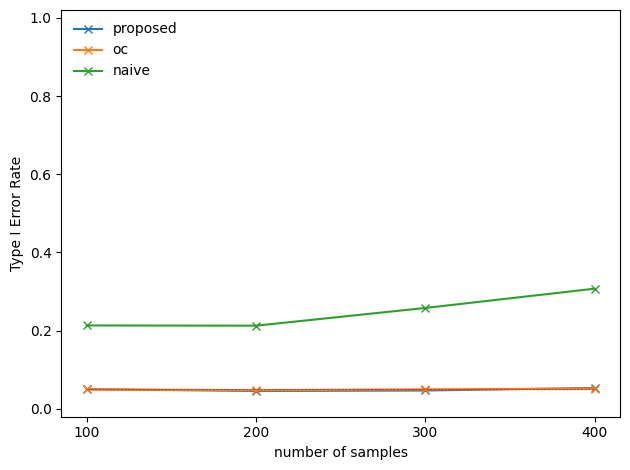

In [4]:
# option 1 type I error rate when changing n, not cv

op1 = []
op1_oc = []
op1_naive = []

for n in (ns := [100, 200, 300, 400]):
    si, oc, naive = compute_rejection(10, 'op1', n=n, is_naive=True, is_oc=True)
    op1.append(si)
    op1_oc.append(oc)
    op1_naive.append(naive)

plt.plot(ns, op1, label='proposed', marker="x")
plt.plot(ns, op1_oc, label='oc', marker="x")
plt.plot(ns, op1_naive, label='naive', marker="x")
plt.plot(ns, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ns)
plt.xlabel('number of samples')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure_paper/fpr_op1_n.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)

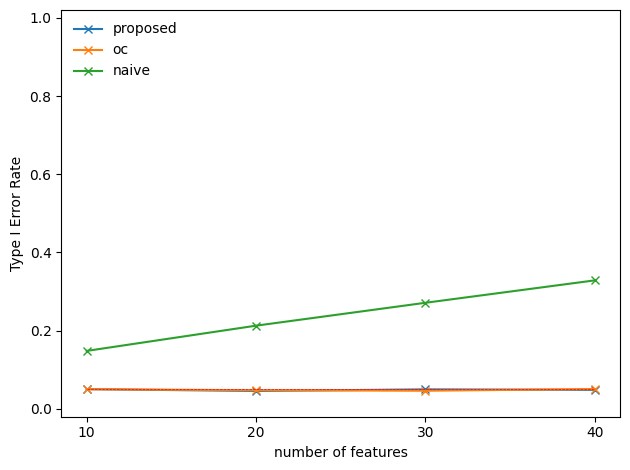

In [5]:
# option 1 type I error rate when changing p, not cv

op1 = []
op1_oc = []
op1_naive = []

for p in (ps := [10, 20, 30, 40]):
    si, oc, naive = compute_rejection(10, 'op1', p=p, is_naive=True, is_oc=True)
    op1.append(si)
    op1_oc.append(oc)
    op1_naive.append(naive)

plt.plot(ps, op1, label='proposed', marker="x")
plt.plot(ps, op1_oc, label='oc', marker="x")
plt.plot(ps, op1_naive, label='naive', marker="x")
plt.plot(ps, 0.05 * np.ones(len(ps)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ps)
plt.xlabel('number of features')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure_paper/fpr_op1_p.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

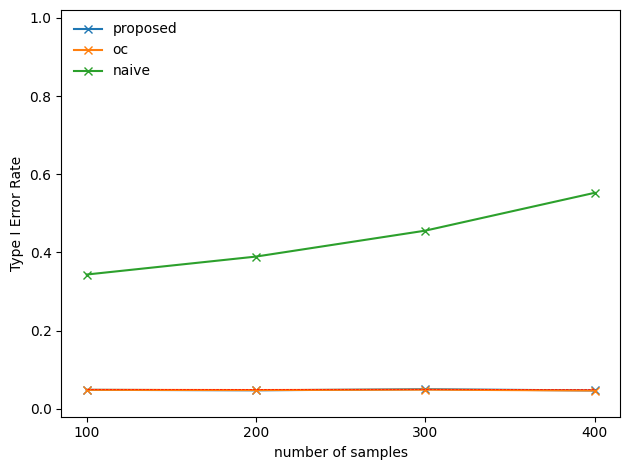

In [7]:
# option 2 type I error rate when changing n, not cv

op2 = []
op2_oc = []
op2_naive = []

for n in (ns := [100, 200, 300, 400]):
    si, oc, naive = compute_rejection(10, 'op2', n=n, is_naive=True, is_oc=True)
    op2.append(si)
    op2_oc.append(oc)
    op2_naive.append(naive)

plt.plot(ns, op2, label='proposed', marker="x")
plt.plot(ns, op2_oc, label='oc', marker="x")
plt.plot(ns, op2_naive, label='naive', marker="x")
plt.plot(ns, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ns)
plt.xlabel('number of samples')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure_paper/fpr_op2_n.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

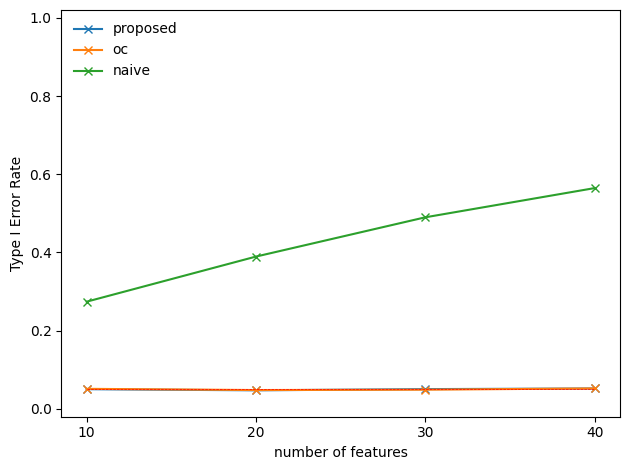

In [8]:
# option 2 type I error rate when changing p, not cv

op2 = []
op2_oc = []
op2_naive = []

for p in (ps := [10, 20, 30, 40]):
    si, oc, naive = compute_rejection(10, 'op2', p=p, is_naive=True, is_oc=True)
    op2.append(si)
    op2_oc.append(oc)
    op2_naive.append(naive)

plt.plot(ps, op2, label='proposed', marker="x")
plt.plot(ps, op2_oc, label='oc', marker="x")
plt.plot(ps, op2_naive, label='naive', marker="x")
plt.plot(ps, 0.05 * np.ones(len(ps)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ps)
plt.xlabel('number of features')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure_paper/fpr_op2_p.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

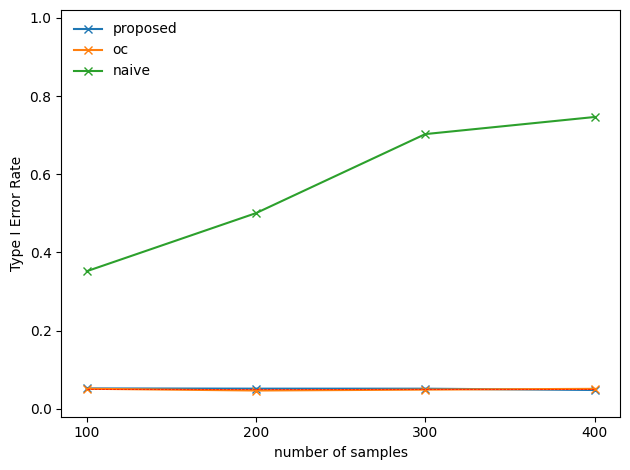

In [13]:
# all cv type I error rate when changing n, cv

allcv = []
allcv_oc = []
allcv_naive = []

for n in (ns := [100, 200, 300, 400]):
    si, oc, naive = compute_rejection(10, 'op12cv', n=n, is_naive=True, is_oc=True)
    allcv.append(si)
    allcv_oc.append(oc)
    allcv_naive.append(naive)

plt.plot(ns, allcv, label='proposed', marker="x")
plt.plot(ns, allcv_oc, label='oc', marker="x")
plt.plot(ns, allcv_naive, label='naive', marker="x")
plt.plot(ns, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ns)
plt.xlabel('number of samples')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure_paper/fpr_allcv_n.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

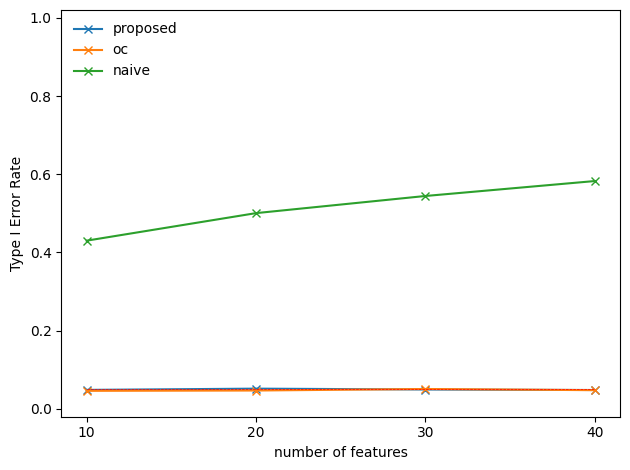

In [14]:
# all cv type I error rate when changing p, cv

allcv = []
allcv_oc = []
allcv_naive = []

for p in (ps := [10, 20, 30, 40]):
    si, oc, naive = compute_rejection(10, 'op12cv', p=p, is_naive=True, is_oc=True)
    allcv.append(si)
    allcv_oc.append(oc)
    allcv_naive.append(naive)

plt.plot(ps, allcv, label='proposed', marker="x")
plt.plot(ps, allcv_oc, label='oc', marker="x")
plt.plot(ps, allcv_naive, label='naive', marker="x")
plt.plot(ps, 0.05 * np.ones(len(ps)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ps)
plt.xlabel('number of features')
plt.ylabel('Type I Error Rate')
plt.legend(frameon=False, loc='upper left')
plt.savefig('figure_paper/fpr_allcv_p.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)
plt.show()

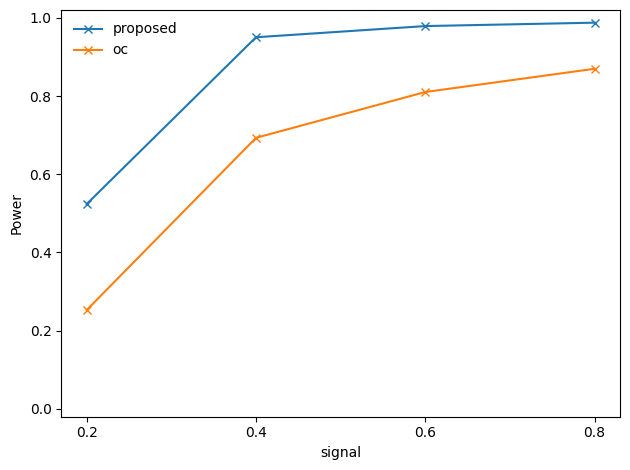

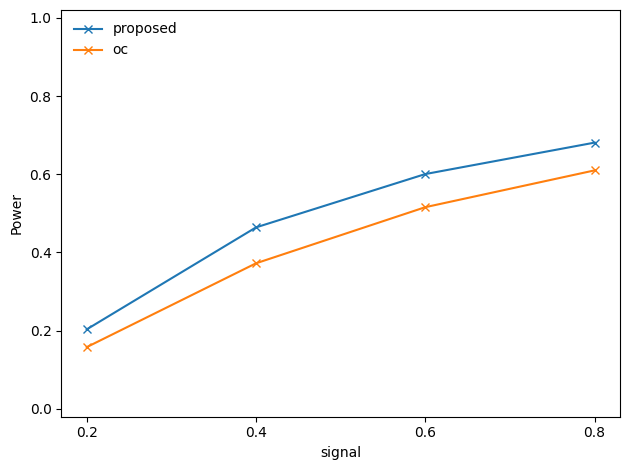

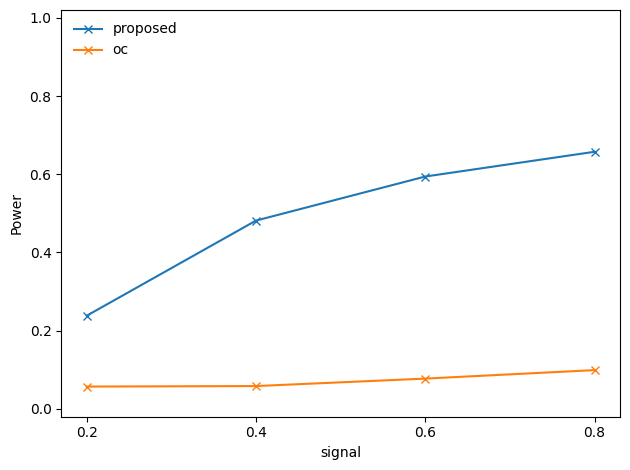

In [16]:
# option 1 power when changing signal, cv

op1 = []
op2 = []
allcv = []

op1_oc = []
op2_oc = []
allcv_oc = []

num_seeds = 10

for delta in (deltas := [0.2, 0.4, 0.6, 0.8]):
    si, oc, _ = compute_rejection(num_seeds, 'op1', delta=delta, is_oc=True)
    op1.append(si)
    op1_oc.append(oc)

    si, oc, _ = compute_rejection(num_seeds, 'op2', delta=delta, is_oc=True)
    op2.append(si)
    op2_oc.append(oc)

    si, oc, _ = compute_rejection(num_seeds, 'op12cv', delta=delta, is_oc=True)
    allcv.append(si)
    allcv_oc.append(oc)

for pl, pl_oc, name in [(op1, op1_oc, "op1"), (op2, op2_oc, "op2"), (allcv, allcv_oc, "allcv")]:
    plt.figure()
    plt.plot(deltas, pl, label='proposed', marker="x")
    plt.plot(deltas, pl_oc, label='oc', marker="x")

    plt.ylim(-0.02, 1.02)
    plt.xticks(deltas)
    plt.xlabel('signal')
    plt.ylabel('Power')
    plt.legend(frameon=False, loc='upper left')
    plt.savefig(f'figure_paper/tpr_{name}.pdf', bbox_inches='tight', pad_inches=0.0, transparent=True)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

option = "op12cv"
keys = ["heating_load", "cooling_load", "gas_turbine", "red_wine", "white_wine", "abalone", "concrete", "housing"]
# keys = [keys[7]]
# print(*keys)

def get_tpr(key, option):
    tpr_para_list = []
    tpr_oc_list = []
    for n in (ns := [100, 150, 200]):
        results = []
        for seed in range(num_seeds := 1):
            with open(f"real/results/{option}_{key}_{n}_{seed}.pkl", 'rb') as f:
                results += pickle.load(f)

        para_results = [result[0] for result in results if result[0] is not None]
        oc_results = [result[1] for result in results if result[1] is not None]

        p_para = np.array([result.p_value for result in para_results])
        p_oc = np.array([result.p_value for result in oc_results])
        assert len(p_para) == 1000, (key, n, len(p_para))

        tpr_para_list.append(np.mean(p_para < 0.05))
        tpr_oc_list.append(np.mean(p_oc < 0.05))
    return tpr_para_list, tpr_oc_list

para_tpr = []
oc_tpr = []
for key in keys:
    para, oc = get_tpr(key, "op12cv")
    para_tpr.append(para)
    oc_tpr.append(oc)

para_tpr = np.array(para_tpr)
oc_tpr = np.array(oc_tpr)

In [54]:
print(para_tpr.shape)
ns = [100, 150, 200]

from decimal import Decimal

for i in range(3):
    print(f"$n={ns[i]}$", end="")
    for j in range(8):
        para = para_tpr[j, i]
        oc = oc_tpr[j, i]
        para = Decimal(str(para)).quantize(Decimal('0.01'), "ROUND_HALF_UP")
        oc = Decimal(str(oc)).quantize(Decimal('0.01'), "ROUND_HALF_UP")
        print(" & ", end="")
        print(f"\\textbf{{{str(para)[1:]}}}/{str(oc)[1:]}", end="")
    print(" \\\\")
print()

(8, 3)
$n=100$ & \textbf{.59}/.11 & \textbf{.54}/.10 & \textbf{.74}/.11 & \textbf{.33}/.05 & \textbf{.33}/.06 & \textbf{.34}/.06 & \textbf{.54}/.07 & \textbf{.50}/.05 \\
$n=150$ & \textbf{.70}/.13 & \textbf{.60}/.12 & \textbf{.79}/.12 & \textbf{.43}/.07 & \textbf{.38}/.06 & \textbf{.43}/.06 & \textbf{.69}/.06 & \textbf{.63}/.06 \\
$n=200$ & \textbf{.75}/.16 & \textbf{.69}/.14 & \textbf{.82}/.15 & \textbf{.46}/.05 & \textbf{.45}/.07 & \textbf{.55}/.07 & \textbf{.74}/.09 & \textbf{.77}/.06 \\



In [23]:
array = np.array([1, 2, 3, 4, 5])

# &区切りでプリントします
print('&'.join(map(str, array)))

1&2&3&4&5
